$$P(X) = p_{g} X^{n} - X^{n - 1} + \sum_{d = 0}^{n - 2} f_{n - 1 - d} p_{n - 1 - d} X^{d}$$

Soit $d$ tel que $f_{n - 1 - d} > 0$. Soit $\varepsilon > 0$. Alors $P(\varepsilon) \geqslant f_{n - 1 - d} p_{n - 1 - d} \varepsilon^{d} - \varepsilon^{n - 1} \sim f_{n - 1 - d} p_{n - 1 - d} \varepsilon^{d} > 0$. Et $P(1) = 0$ avec $P$ non nul lorsque $1 < |X|$. Or $\lim_{X \to +\infty} P(X) = +\infty$. Donc $P$ s'annule en $r_{0} \in ]0, 1[$.

$$P(R) = p_{g} (R - 1) (R - r_{0}) T(R)$$

où $T$ unitaire avec $\deg T = n - 2$ à coefficients réels positifs (À redémontrer ici).

Une CS pour montrer que $P$ a exactement $n - 2$ zéros de module inférieur à $r_{0}$ serait de montrer pour un $r_{1} < r_{0}$ que

$$T(r_{1}) < 2 r_{1}^{n - 2} ?$$

$T(r_{1}) < 2 r_{1}^{n - 2} \iff P(r_{1}) < 2 p_{g} (r_{1} - 1) (r_{1} - r_{0}) r_{1}^{n - 2}$

Notons $\varepsilon = r_{0} - r_{1}$. En utilisant $P(r_{1}) < p_{g} r_{0}^{n} - r_{0}^{n - 1} + (n - 1) \varepsilon r_{0}^{n - 2} + \sum_{d = 0}^{n - 2} f_{n - 1 - d} p_{n - 1 - d} r_{0}^{d}$, il suffit de mq $(n - 1) \varepsilon r_{0}^{n - 2} < 2 p_{g} (1 - r_{1}) r_{1}^{n - 2} \varepsilon$. FAUX !

Rouché semble ne rien donner.

Démonstration $n = 3$ :

$P(X) = p_{g} (X - 1) (X^{2} - s X + p) = p_{g} [X^{3} - (s + 1) X^{2} + (s + p) X - p] \implies p_{g} (s + 1) = 1 \implies r_{0} > |r_{1}|$.

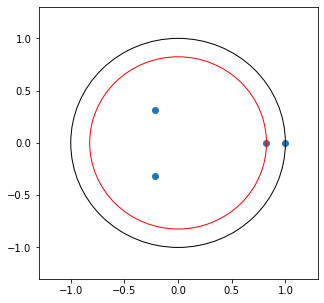

In [532]:
import matplotlib.pyplot as plt
import numpy as np

z = 1  # Nombre de zéros
n = 4  # Nombre de numéros (zéros exclus)
p = lambda d: n / (n + z) / (d + 1)
f = np.random.random(n - 1)
f /= np.sum(f)
p_g = 1 - f @ p(np.arange(1, n))
P = np.append((p_g, -1), f * p(np.arange(1, n)))
r = np.roots(P)

plt.figure(figsize=(5, 5))
plt.xlim([-1.3, 1.3])
plt.ylim([-1.3, 1.3])
circle0 = plt.Circle((0, 0), 1, edgecolor='k', fill=False)
circle1 = plt.Circle((0, 0), np.abs(r[1]), edgecolor='r', fill=False)
plt.gcf().gca().add_patch(circle0)
plt.gcf().gca().add_patch(circle1)
plt.scatter(np.real(r), np.imag(r))
plt.show()